## Dataset

## Objective/Business Solution

- Build a system that can predict pricing for a mobile phone using data on available phones in the market. 
- Predict if the mobile can be priced low/med/high/very high.
- Explore the data to understand the features and figure out an approach.

## Importing the libraries

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import joblib

pd.set_option('display.max_columns', None)

## Loading the data

In [32]:
df = pd.read_csv('dataset.csv')

In [33]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## Data Cleaning

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [35]:
df.duplicated().sum()

0

#### As per the above process, we can say there is no null or duplicated values

## EDA

In [39]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [48]:
column_names = pd.Series(df.columns.tolist())

In [45]:
float_col = ['clock_speed', 'm_dep']
int_col = column_names[~column_names.isin(float_col)].tolist()

print(f'Integer columns are : {int_col}')
print('')
print(f'Float columns are: {float_col}')

Integer columns are : ['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

Float columns are: ['clock_speed', 'm_dep']


In [46]:
df[float_col] = df[float_col].astype('float16')
df[int_col] = df[int_col].astype('int16')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int16  
 1   blue           2000 non-null   int16  
 2   clock_speed    2000 non-null   float16
 3   dual_sim       2000 non-null   int16  
 4   fc             2000 non-null   int16  
 5   four_g         2000 non-null   int16  
 6   int_memory     2000 non-null   int16  
 7   m_dep          2000 non-null   float16
 8   mobile_wt      2000 non-null   int16  
 9   n_cores        2000 non-null   int16  
 10  pc             2000 non-null   int16  
 11  px_height      2000 non-null   int16  
 12  px_width       2000 non-null   int16  
 13  ram            2000 non-null   int16  
 14  sc_h           2000 non-null   int16  
 15  sc_w           2000 non-null   int16  
 16  talk_time      2000 non-null   int16  
 17  three_g        2000 non-null   int16  
 18  touch_sc

#### The size of the data has been decreased from 328 kb to 82 kb

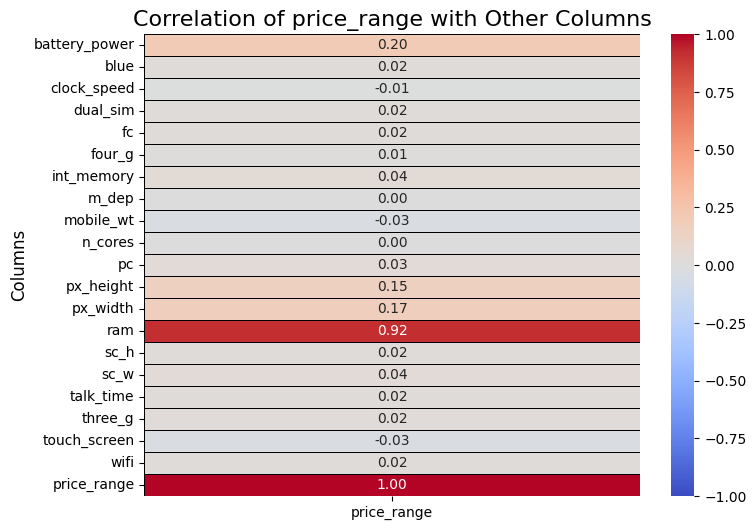

In [66]:
correlation_matrix = df.corr()
price_corr = correlation_matrix[['price_range']]

plt.figure(figsize=(8, 6))
sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Correlation of price_range with Other Columns', fontsize=16)
plt.ylabel('Columns', fontsize=12)

plt.show()

#### RAM of mobile has max positive correlation with price

## Feature Engineering

In [71]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.199219,0,1,0,7,0.600098,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500000,1,0,1,53,0.700195,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.500000,1,2,1,41,0.899902,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.500000,0,0,0,10,0.799805,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.200195,0,13,1,44,0.600098,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.500000,1,0,1,2,0.799805,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.599609,1,0,0,39,0.199951,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.899902,1,1,1,36,0.700195,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.899902,0,4,1,46,0.099976,145,5,5,336,670,869,18,10,19,1,1,1,0


In [72]:
clean_columns = ['blue', 'dual_sim', 'four_g', 'm_dep', 'three_g', 'touch_screen', 'wifi']

continuous_data_col = column_names[~column_names.isin(clean_columns)].tolist()

In [82]:
X = df.drop('price_range',axis=1)
y = df['price_range']

In [83]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.199219,0,1,0,7,0.600098,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.500000,1,0,1,53,0.700195,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.500000,1,2,1,41,0.899902,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.500000,0,0,0,10,0.799805,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.200195,0,13,1,44,0.600098,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.500000,1,0,1,2,0.799805,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.599609,1,0,0,39,0.199951,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.899902,1,1,1,36,0.700195,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.899902,0,4,1,46,0.099976,145,5,5,336,670,869,18,10,19,1,1,1


In [80]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int16

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
scaler = StandardScaler()

In [88]:
scaler.fit(X_train)

StandardScaler()

In [89]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_scaled

array([[-0.7638951 ,  1.0129409 , -1.1221627 , ..., -1.8006734 ,
         0.991465  ,  1.0014297 ],
       [-0.09785191,  1.0129409 , -1.2435116 , ...,  0.55534786,
         0.991465  ,  1.0014297 ],
       [ 0.62915117, -0.98722446,  0.69570225, ...,  0.55534786,
         0.991465  , -0.99857247],
       ...,
       [ 1.3290609 ,  1.0129409 , -1.2435116 , ...,  0.55534786,
        -1.0086085 ,  1.0014297 ],
       [ 1.5503228 , -0.98722446, -0.75870806, ..., -1.8006734 ,
         0.991465  ,  1.0014297 ],
       [-1.3667207 ,  1.0129409 , -1.1221627 , ...,  0.55534786,
        -1.0086085 , -0.99857247]], dtype=float32)

In [92]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

In [98]:
for name, clf in classifiers.items():
    # Compute cross-validation scores
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean_score = cv_scores.mean()
    
    # Fit the model on the entire training set
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{name} Results:")
    print(f"Cross-Validation Accuracy: {cv_mean_score:.2f}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("-" * 50)

Random Forest Results:
Cross-Validation Accuracy: 0.86
Test Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       151
           1       0.85      0.88      0.87       146
           2       0.82      0.80      0.81       148
           3       0.91      0.88      0.89       155

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

--------------------------------------------------
Support Vector Machine Results:
Cross-Validation Accuracy: 0.86
Test Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.78      0.84      0.81       146
           2       0.85      0.82      0.84       148
           3       0.95      0.92      0.93       155

    accuracy                         

As we can clearly Logistic regression is performing better in F1 score and all aspects

## Save model

In [143]:
model = LogisticRegression()

best_cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
best_cv_mean_score = best_cv_scores.mean()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"{name} Results:")
print(f"Cross-Validation Accuracy: {cv_mean_score:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("-" * 50)

Decision Tree Results:
Cross-Validation Accuracy: 0.82
Test Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

--------------------------------------------------


In [147]:
joblib.dump(scaler, 'preprocessor.joblib')
joblib.dump(model, 'model.joblib')

['model.joblib']

In [146]:
X_new = pd.DataFrame({'battery_power': [842],
    'blue': [0],
    'clock_speed': [2.19921875],
    'dual_sim': [0],
    'fc': [1],
    'four_g': [0],
    'int_memory': [7],
    'm_dep': [0.60009765625],
    'mobile_wt': [188],
    'n_cores': [2],
    'pc': [2],
    'px_height': [20],
    'px_width': [756],
    'ram': [2549],
    'sc_h': [9],
    'sc_w': [7],
    'talk_time': [19],
    'three_g': [0],
    'touch_screen': [0],
    'wifi': [1]})

X_new

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.199219,0,1,0,7,0.600098,188,2,2,20,756,2549,9,7,19,0,0,1


In [148]:
scaled_data = scaler.transform(X_new)
model.predict(scaled_data)[0]

1